# Summative Assessment - Data Analytics and Visualization

## Michael NANA KAMENI

This assessment will cover the following:
- Importing the data and dealing with missing values
- Exploring the data and producing some simple visualizations
- Sampling and comparing samples
- Looking for correlation
- Using regression to predict power consumption

It's split into tasks, each in its own section. Write your code and answers in the spaces provided. Feel free to add cells and import any libraries you'll require.

## The data

The data we'll be using in this assesssment was downloaded from data.world (https://data.world/databeats/household-power-consumption), a subset of a larger dataset available from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption#).

It may look familiar to some of you!

Here's the description of the data from the site:

<b>Data Set Information</b>

This household electricity consumption dataset contains 260,640 measurements gathered between January 2007 and June 2007 (6 months). It is a subset of a larger, original archive that contains 2,075,259 measurements gathered between December 2006 and November 2010 (47 months).

<b>Attribute Information</b>

date: Date in format dd/mm/yyyy
time: time in format hh:mm:ss
global_active_power: household global minute-averaged active power (in kilowatt)
global_reactive_power: household global minute-averaged reactive power (in kilowatt)
voltage: minute-averaged voltage (in volt)
global_intensity: household global minute-averaged current intensity (in ampere)
sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

## Assessment Flow

## Task 1 - Getting the data!

*The* data has not been downloaded for you. Save the file and add the correct file path for your file.

In [1]:
file_path = 'household_power_consumption-household_power_consumption.csv'

It is comma separated, but has a major issue you'll have to deal with before you can begin working with it: missing values are marked with a '?'. You'll need to remove all rows with missing values and make sure the columns are the right type before we move on. This is a classic example of a problem whose solution isn't worth memorizing, so if you're struggling take a look around on stack overflow or elsewhere for others who've solved the same problem!

In [2]:
# Import the libraries you'll be using and load the data into a pandas dataframe here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats 

Now, we can start looking at this data. Assuming you've called your dataframe 'df', run df.head() and df.describe() to see what we're working with. Remember, at this stage you shouldn't have missing data.

In [3]:
# Look at the data you've loaded
df = pd.read_csv(file_path, sep=';', low_memory=False)

In [4]:
# Let's have a look at the first ten rows
df.head(10) 

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,01/01/2007,00:00:00,2.58,0.136,241.97,10.6,0,0,0.0
1,01/01/2007,00:01:00,2.552,0.1,241.75,10.4,0,0,0.0
2,01/01/2007,00:02:00,2.55,0.1,241.64,10.4,0,0,0.0
3,01/01/2007,00:03:00,2.55,0.1,241.71,10.4,0,0,0.0
4,01/01/2007,00:04:00,2.554,0.1,241.98,10.4,0,0,0.0
5,01/01/2007,00:05:00,2.55,0.1,241.83,10.4,0,0,0.0
6,01/01/2007,00:06:00,2.534,0.096,241.07,10.4,0,0,0.0
7,01/01/2007,00:07:00,2.484,0,241.29,10.2,0,0,0.0
8,01/01/2007,00:08:00,2.468,0,241.23,10.2,0,0,0.0
9,01/01/2007,00:09:00,2.486,0,242.18,10.2,0,0,0.0


In [5]:
# Let's have a look at the last ten rows
df.tail(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
260630,30/06/2007,23:50:00,1.922,0.374,240.21,8.2,0,0,0.0
260631,30/06/2007,23:51:00,2.916,0.358,238.68,12.2,0,0,17.0
260632,30/06/2007,23:52:00,2.914,0.36,239.07,12.2,0,0,18.0
260633,30/06/2007,23:53:00,2.896,0.358,239.01,12.2,0,0,18.0
260634,30/06/2007,23:54:00,2.88,0.358,238.7,12,0,0,17.0
260635,30/06/2007,23:55:00,2.88,0.36,239.01,12,0,0,18.0
260636,30/06/2007,23:56:00,2.892,0.358,238.86,12.2,0,0,17.0
260637,30/06/2007,23:57:00,2.882,0.28,239.05,12,0,0,18.0
260638,30/06/2007,23:58:00,2.66,0.29,238.98,11.2,0,0,18.0
260639,30/06/2007,23:59:00,2.548,0.354,239.25,10.6,0,1,17.0


In [6]:
# Summary statistics with all details
df.describe()

,Sub_metering_3
count,256869.000000
mean,5.831825
std,8.186709
min,0.000000
25%,0.000000
50%,0.000000
75%,17.000000
max,20.000000


In [7]:
# Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260640 entries, 0 to 260639
Data columns (total 9 columns):
Date                     260640 non-null object
Time                     260640 non-null object
Global_active_power      260640 non-null object
Global_reactive_power    260640 non-null object
Voltage                  260640 non-null object
Global_intensity         260640 non-null object
Sub_metering_1           260640 non-null object
Sub_metering_2           260640 non-null object
Sub_metering_3           256869 non-null float64
dtypes: float64(1), object(8)
memory usage: 17.9+ MB


In [8]:
# Converting data columns from object to float
df["Global_active_power"]=pd.to_numeric(df["Global_active_power"],errors='coerce')
df["Global_reactive_power"]=pd.to_numeric(df["Global_reactive_power"],errors='coerce')
df["Voltage"]=pd.to_numeric(df["Voltage"],errors='coerce')
df["Global_intensity"]=pd.to_numeric(df["Global_intensity"],errors='coerce')
df["Sub_metering_1"]=pd.to_numeric(df["Sub_metering_1"],errors='coerce')
df["Sub_metering_2"]=pd.to_numeric(df["Sub_metering_2"],errors='coerce')
df["Sub_metering_3"]=pd.to_numeric(df["Sub_metering_3"],errors='coerce')

In [9]:
# Let us count the number of null values in each column:
df.isnull().sum()

Date                        0
Time                        0
Global_active_power      3771
Global_reactive_power    3771
Voltage                  3771
Global_intensity         3771
Sub_metering_1           3771
Sub_metering_2           3771
Sub_metering_3           3771
dtype: int64

In [10]:
# Now let us deal with columns data that have the '?':
df.replace('?', np.NaN, inplace=True)  # replace the '?' by NaN in their respective cells
df.shape                 # Check number of rows and number of columns

(260640, 9)

In [11]:
df.dropna(inplace=True) # Let us drop rows that have cells with null values
df.shape        # Check number of rows and number of columns

(256869, 9)

In [12]:
df = df.drop_duplicates() # Let us drop rows that have cells with null values
df.shape                  # Check number of rows and number of columns

(256869, 9)

In [13]:
# Let's have a look at the first ten rows
df.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,01/01/2007,00:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0
1,01/01/2007,00:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0
2,01/01/2007,00:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0
3,01/01/2007,00:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0
4,01/01/2007,00:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0
5,01/01/2007,00:05:00,2.550,0.100,241.83,10.4,0.0,0.0,0.0
6,01/01/2007,00:06:00,2.534,0.096,241.07,10.4,0.0,0.0,0.0
7,01/01/2007,00:07:00,2.484,0.000,241.29,10.2,0.0,0.0,0.0
8,01/01/2007,00:08:00,2.468,0.000,241.23,10.2,0.0,0.0,0.0
9,01/01/2007,00:09:00,2.486,0.000,242.18,10.2,0.0,0.0,0.0


In [14]:
# Let's have a look at the last ten rows
df.tail(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
260630,30/06/2007,23:50:00,1.922,0.374,240.21,8.2,0.0,0.0,0.0
260631,30/06/2007,23:51:00,2.916,0.358,238.68,12.2,0.0,0.0,17.0
260632,30/06/2007,23:52:00,2.914,0.360,239.07,12.2,0.0,0.0,18.0
260633,30/06/2007,23:53:00,2.896,0.358,239.01,12.2,0.0,0.0,18.0
260634,30/06/2007,23:54:00,2.880,0.358,238.70,12.0,0.0,0.0,17.0
260635,30/06/2007,23:55:00,2.880,0.360,239.01,12.0,0.0,0.0,18.0
260636,30/06/2007,23:56:00,2.892,0.358,238.86,12.2,0.0,0.0,17.0
260637,30/06/2007,23:57:00,2.882,0.280,239.05,12.0,0.0,0.0,18.0
260638,30/06/2007,23:58:00,2.660,0.290,238.98,11.2,0.0,0.0,18.0
260639,30/06/2007,23:59:00,2.548,0.354,239.25,10.6,0.0,1.0,17.0


In [15]:
# Plot a line chart
from datetime import datetime
#from datetime import datetime.fromtimestamp(Timestamp)
df['Datetime'] = df.Date.astype(str).str.cat(df.Time.astype(str), sep=' ')
#df['Datetime'] = pd.to_datetime(df['Datetime'], "%d-%m-%Y %H:%M:%S")

In [16]:
# Summary statistics with all details
old_sum_df = df.describe()
old_sum_df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,256869.000000,256869.000000,256869.000000,256869.000000,256869.000000,256869.000000,256869.000000
mean,1.164937,0.123729,239.208981,4.974755,1.332481,1.670610,5.831825
std,1.181832,0.111872,3.592793,4.999493,6.704970,6.631361,8.186709
min,0.082000,0.000000,223.490000,0.400000,0.000000,0.000000,0.000000
25%,0.296000,0.000000,236.650000,1.400000,0.000000,0.000000,0.000000
50%,0.564000,0.104000,239.610000,2.600000,0.000000,0.000000,0.000000
75%,1.606000,0.194000,241.810000,6.800000,0.000000,1.000000,17.000000
max,10.670000,1.148000,250.890000,46.400000,78.000000,78.000000,20.000000


### Interpretation
We observe that looking at the difference between the third quartile equal to 1.61 and the maximum equal to 10.67 for <b>Global active power</b>, one may easily suspect presence of outlier. The same thing for  <b>Sub metering 1</b>, and  <b>Sub metering 2</b>. To push analysis let us use pairplot to have a clear view of our opinion.

In [17]:
df['Sub_metering_1'].value_counts()

0.0     233670
1.0      11077
2.0       2446
37.0      2296
38.0      1934
         ...  
61.0         1
69.0         1
52.0         1
65.0         1
57.0         1
Name: Sub_metering_1, Length: 78, dtype: int64

In [18]:
df['Sub_metering_2'].value_counts()

0.0     173493
1.0      49493
2.0      20459
3.0       1136
37.0      1112
         ...  
55.0         4
50.0         3
77.0         3
76.0         2
78.0         1
Name: Sub_metering_2, Length: 79, dtype: int64

In [19]:
df['Sub_metering_3'].value_counts()

0.0     169873
17.0     43169
18.0     33623
16.0      7445
19.0      1592
15.0       122
4.0         92
9.0         92
1.0         82
13.0        80
7.0         79
11.0        78
12.0        77
5.0         73
3.0         70
2.0         70
6.0         69
8.0         66
10.0        59
14.0        55
20.0         3
Name: Sub_metering_3, dtype: int64

In [20]:
#Let's drop date and time 
#df.drop(columns=['Date', 'Time'], inplace = True)

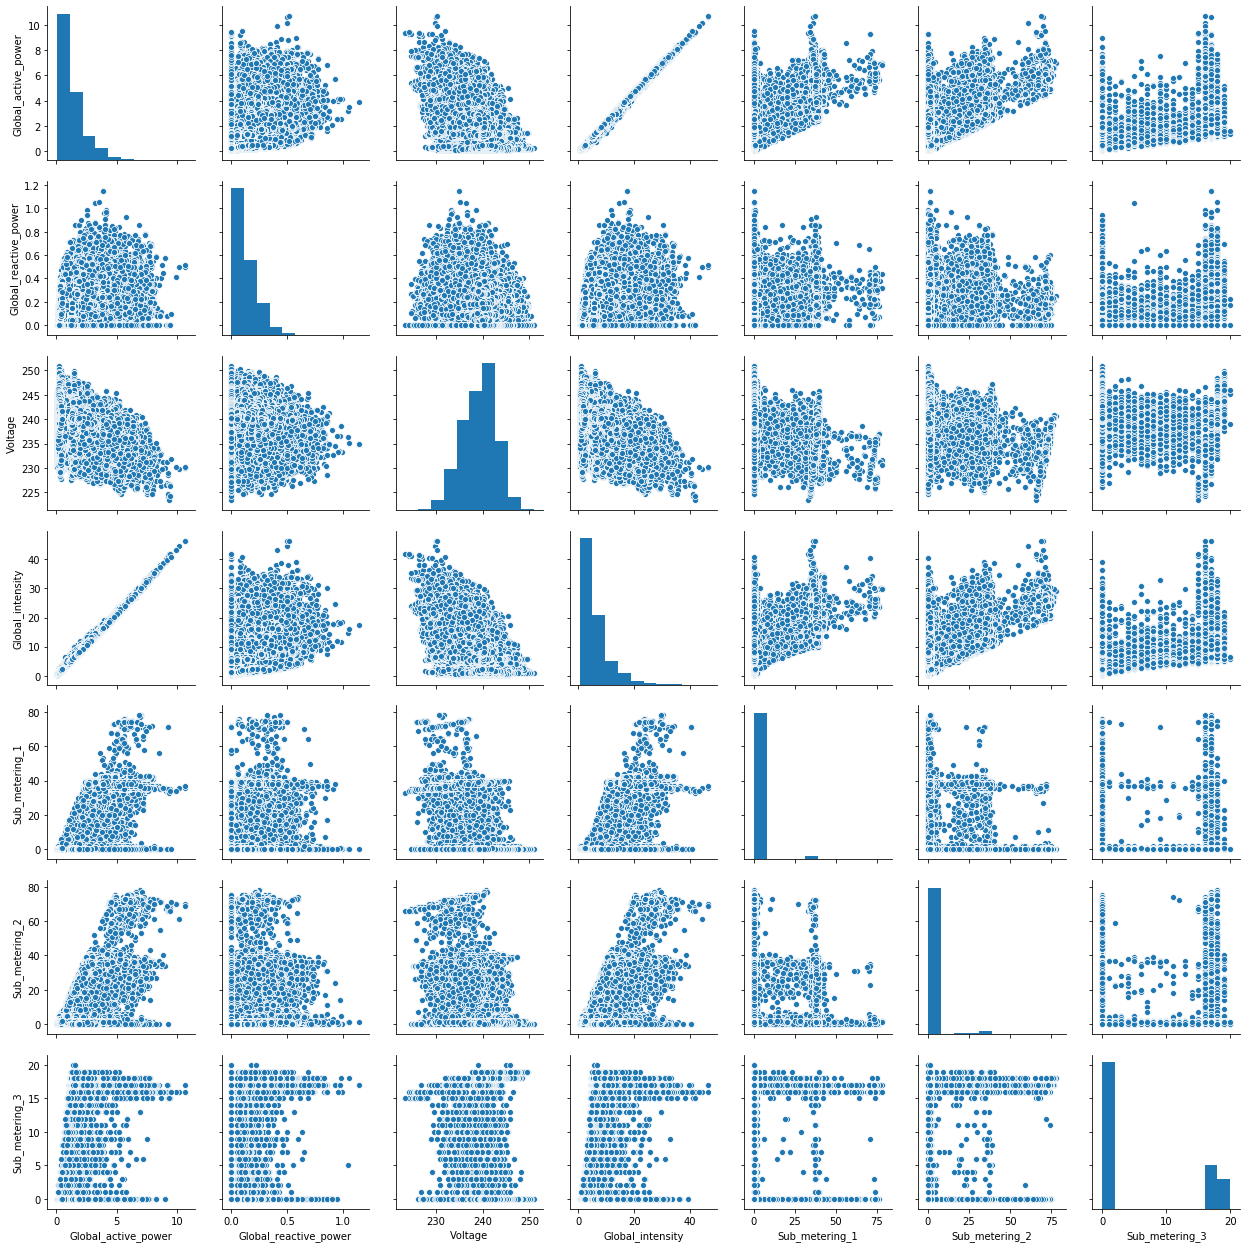

In [21]:
sns.pairplot(df)

## Interpretation
Our suspicious seem to be wrong. But from the graph, we just plot, we could observe a strong positive correlation between <b>Global active power</b> and <b>Global intensity</b>.  Concerning those two variables, when <b>Global active power</b> increases, the <b>Global intensity</b> increases as well and vice versa.   

#### Interpretation of Distribution of Global active power
We see a peak in the data at the top left. To the right of the peak, we observe a few data points that stretch. This shape does not occur to the left of the peak. The data is skewed to the right, indicated by the tail stretching off to the right.

#### Interpretation of Distribution of Global reactive power
We see a peak in the data at the top left. To the right of the peak, we observe a few data points that stretch. This shape does not occur to the left of the peak. The data is skewed to the right, indicated by the tail stretching off to the right.

#### Interpretation of Distribution of Global intensity
We see that the data data points centred in the range  237.5≤𝑥<242. We see a peak in the data. To the left of the peak, we observe a few data points that stretch from 227.5 to 240. This type of shape does occur to the right of the peak from 242.5 to 252. With addition of great amount of data to the already existant I think Global intensity will follow normal distribution.

#### Interpretation of Distribution of Global intensity
We see a peak in the data at the top left. To the right of the peak, we observe a few data points that stretch. This shape does not occur to the left of the peak. The data is skewed to the right, indicated by the tail stretching off to the right.

#### Interpretation of Distribution of Sub metering 1
We see that the data points are concentrated at two bars chart. The highest bar is between $0$ and $10$. Through this distribution of data, we could see that <b>Sub metering 1</b> looks like a binomial distribution but it is not the case because of variety in data. 

#### Interpretation of Distribution of Sub metering 2
We see that the data points are concentrated at three bars chart separe in two slots. The highest bar is at the the left side between $0$ and $2$ and the rest of two bars are concentrated between 15 to 35.  

#### Interpretation of Distribution of Sub metering 3
We see that the data points are concentrated at three bars chart separe in two slots. The highest bar is at the the left side between $0$ and $2$ and the rest of two bars are concentrated between 16 to 20. 

Look at the count field - lots of rows! Try running something like df.plot() - it takes a while. Imagine a dataset with 25 million rows. If we're going to be exploring and playing around, we might not want to wait for things to complete. So, sampling! Your next task will be to generate a smaller dataset for data exploration

## Task 2: Subsampling

Create two new dataframes, one with the first 1000 rows of df and another with 1000 rows starting from 75,000. 

In [22]:
# specific sampling the data using iloc
df_1000 = df.iloc[0:1000]         # Dataframe containing the first 1000 rows of df
df_75000 = df.iloc[74999:75999]   # Dataframe containing the first 1000 rows of df starting from 75,000.
print(df_1000.shape, df_75000.shape)

(1000, 10) (1000, 10)


Do you think the first 1000 rows will give a good picture of the whole dataset? Find the mean and std dev for both of your small datasets. Do they match? Do they reflect the statistics for the dataset as a whole? Write your answers to these questions in a cell below the code you use to create and investigate these new dataframes.

### Do you think the first 1000 rows will give a good picture of the whole dataset?
I do not think the small datasets of 1000 rows could give a picture of the whole dataset because there are not representative of the whole dataset in view of their construction. And any analysis resulting from those datasets might be biased. 

### Find the mean and std dev for both of your small datasets. 

In [23]:
sum_1000=df_1000.describe() # Define summary statistics
sum_1000.iloc[1:3]          # Retrive of the summary statistic the mean and the standard deviation(std) 

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
mean,2.384750,0.101824,240.421420,9.874600,0.0,0.246000,3.161000
std,0.573988,0.091648,2.011932,2.345493,0.0,0.545694,6.738582


In [24]:
sum_75000=df_75000.describe() # Define summary statistics
sum_75000.iloc[1:3]           # Retrive of the summary statistic the mean and the standard deviation 

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
mean,1.817106,0.086220,239.81943,7.573200,0.0,0.249000,6.926000
std,1.172613,0.074979,2.09624,4.928047,0.0,0.552543,8.534833


The results of the mean and the standard deviation for the both small datasets do not match. And it is confirming the hypothesis I started earlier saying that both of the datasets of 1000 rows were not representative of the whole dataset regarding their construction concerned. And above all, they do not event reflect the summary statistics of the whole dataset because while comparing the result of each of them, they are different between them and also with the whole dataset, they look totaly different. One can easily remark while comparing the result mean and the standard deviation of <b>Sub metering 1</b> the small datasets which is equal to <b>zeroes (0)</b> with the whole one which are respectively equal to <b>1.33248</b> for the <b>mean</b> and to <b>6.70497</b> for the <b> standard deviation</b>.

Create one new dataframewith the first 10,000 rows of data. Use random sampling to create a dataframe with 10,000 rows taken randomly from within the data and name it df_small. Is this a better representation of the dataset as a whole? If so, we can move on. If not, add more data or make other changes you feel are necessary.

In [25]:
# Let us create a new dataframe with the first 10000 rows of data.
df_small = df[0:10000]
df_small

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,01/01/2007,00:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0,01/01/2007 00:00:00
1,01/01/2007,00:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0,01/01/2007 00:01:00
2,01/01/2007,00:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0,01/01/2007 00:02:00
3,01/01/2007,00:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0,01/01/2007 00:03:00
4,01/01/2007,00:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0,01/01/2007 00:04:00
...,...,...,...,...,...,...,...,...,...,...
9995,07/01/2007,22:35:00,1.728,0.000,241.81,7.2,0.0,0.0,18.0,07/01/2007 22:35:00
9996,07/01/2007,22:36:00,1.720,0.000,242.65,7.0,0.0,0.0,18.0,07/01/2007 22:36:00
9997,07/01/2007,22:37:00,1.738,0.000,242.62,7.2,0.0,0.0,18.0,07/01/2007 22:37:00
9998,07/01/2007,22:38:00,1.686,0.000,242.38,7.0,0.0,0.0,18.0,07/01/2007 22:38:00


In [26]:
# Let us create a dataframe of 10,000 rows with random sampling. 
df_small1 =df.sample(n=10000, axis = 0)
df_small1

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
83025,27/02/2007,15:45:00,0.222,0.000,244.63,1.0,0.0,0.0,0.0,27/02/2007 15:45:00
15118,11/01/2007,11:58:00,0.304,0.164,241.62,1.4,0.0,1.0,0.0,11/01/2007 11:58:00
51370,05/02/2007,16:10:00,1.676,0.094,241.00,6.8,0.0,1.0,18.0,05/02/2007 16:10:00
218530,01/06/2007,18:10:00,0.348,0.078,234.87,1.6,0.0,1.0,0.0,01/06/2007 18:10:00
40682,29/01/2007,06:02:00,0.338,0.152,247.16,1.4,0.0,0.0,0.0,29/01/2007 06:02:00
...,...,...,...,...,...,...,...,...,...,...
215053,30/05/2007,08:13:00,1.276,0.000,231.99,5.4,1.0,0.0,17.0,30/05/2007 08:13:00
94184,07/03/2007,09:44:00,1.738,0.142,236.75,7.4,0.0,2.0,17.0,07/03/2007 09:44:00
24090,17/01/2007,17:30:00,3.962,0.076,239.06,16.6,0.0,32.0,18.0,17/01/2007 17:30:00
151347,16/04/2007,02:27:00,0.130,0.000,242.38,0.6,0.0,0.0,0.0,16/04/2007 02:27:00


## Recall
The new dataframe with the first 10,000 rows as the first two dataframes we have created cannot be representative of the the whole dataset. Whereas the second new dataframe of 10,000 rows generated randomly might be representative of the whole dataset. To confirm it let us check the summary statistics of both of them.

In [27]:
# Find the mean and std dev for the first 10000 rows of your small datasets.
sum_small=df_small.describe() # Define summary statistics
sum_small.iloc[1:3]           # Retrive of the summary statistic the mean and the standard deviation 

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
mean,1.483666,0.133779,240.906520,6.26116,0.585700,1.752500,5.274900
std,1.194093,0.112438,3.350382,5.00432,4.424049,7.661091,8.026118


In [28]:
# Find the mean and std dev for the first 10000 rows of your small datasets.
sum_small1=df_small1.describe() # Define summary statistics
sum_small1.iloc[1:3]           # Retrive of the summary statistic the mean and the standard deviation 

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
mean,1.185285,0.124995,239.209919,5.059980,1.381200,1.672300,5.921600
std,1.185709,0.114146,3.571582,5.011443,6.797713,6.514319,8.220962


In [29]:
# Let us recall the mean and standard deviation of the ancien dataframe
old_sum_df.iloc[1:3]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
mean,1.164937,0.123729,239.208981,4.974755,1.332481,1.670610,5.831825
std,1.181832,0.111872,3.592793,4.999493,6.704970,6.631361,8.186709


Since the result is still does not match, let us reajust the sample dataframe. But the random sample one is far more close to reality. We are going to use that one to continue our work. 

In [30]:
# Let us check if there is duplicate element in the random sampling
sum_small1.duplicated().sum()

0

The result of the random sample of 20,000 rows dataframe could be exploited as it is because it reflects far more the reality while comparing it to the whole dataset result.

## Task 3: Correlation and Plotting

Explore the correlation of various features in the graph. Plot some scatterplots showing the features with the highest correlation coeficient, and some for those with the lowest correlation coeficient. 

- Name two pairs of highly correlated variables. 
- Produce at least three scatter plots.

### Answer:

Let us plot scatterplots to show the features between variable and then we are to analyse to say what have the highest correlation and which have the lowest correlation.

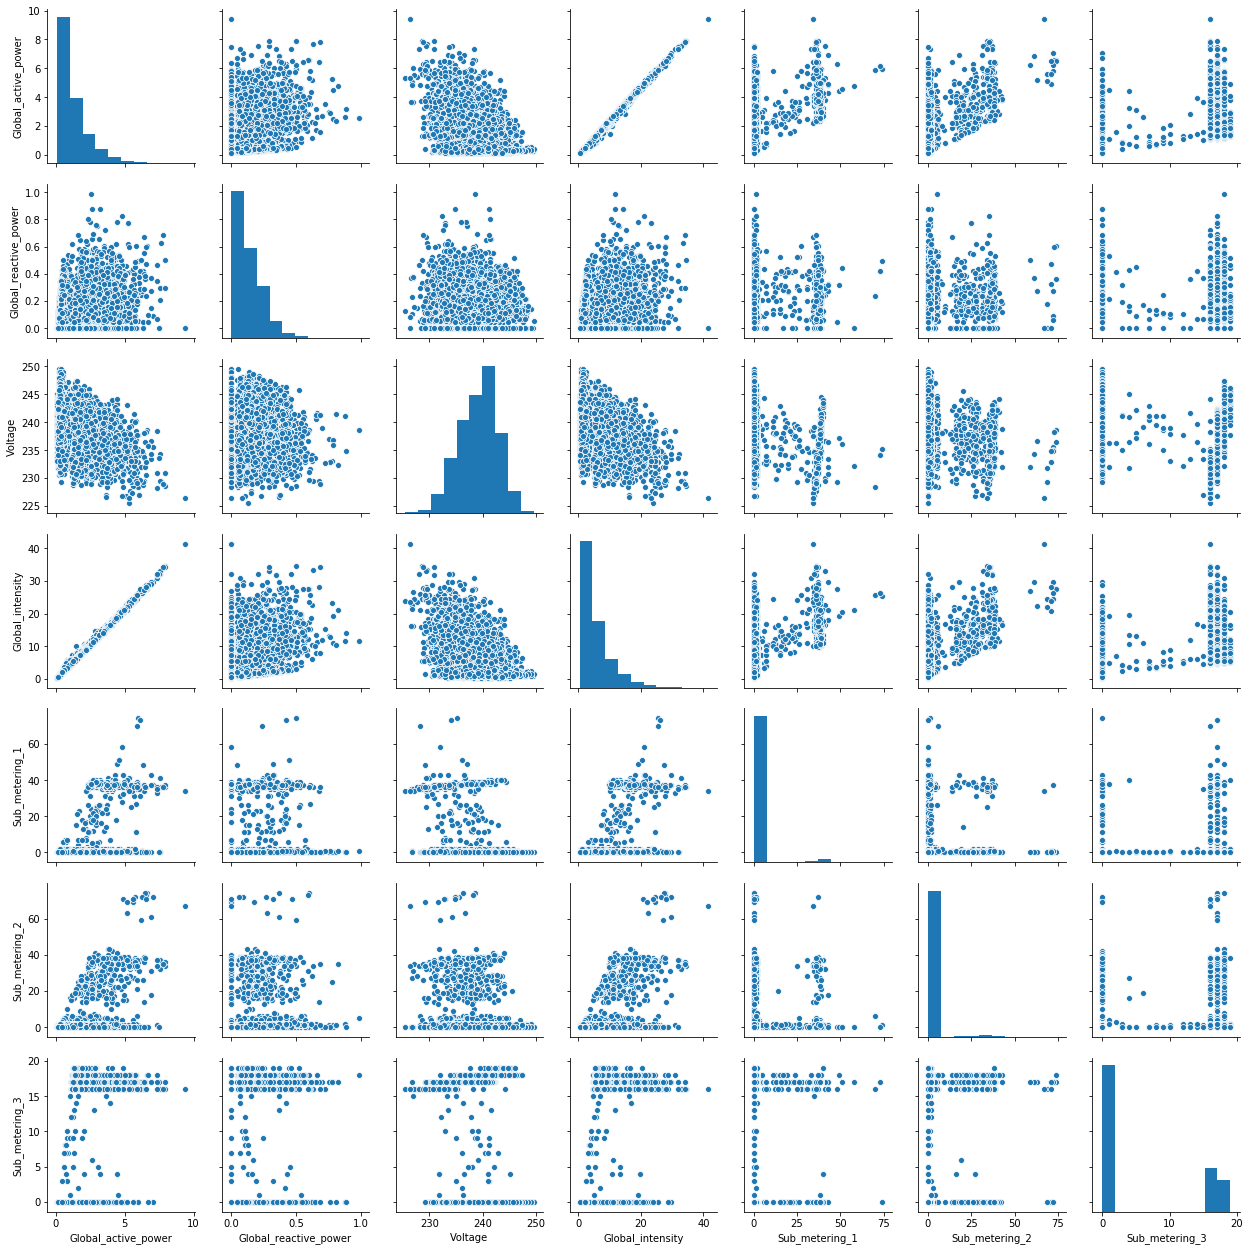

In [31]:
# We are going plot a pairplot to see the correlation between variables:
sns.pairplot(df_small1)

At the first, we can say the variables <b>Global active power</b> and <b>Global intensity</b> are strongly positive correlated. Concerning those two variables, when <b>Global active power</b> increases, the <b>Global intensity</b> increases as well and vice versa. As for the others correlated variable let us, use matrix correlation to check of out, which variables are the lowest correlated because it is difficult to say it at first sight. 

Text(0.5, 1, 'Relationship between Global active power and Global intensity')

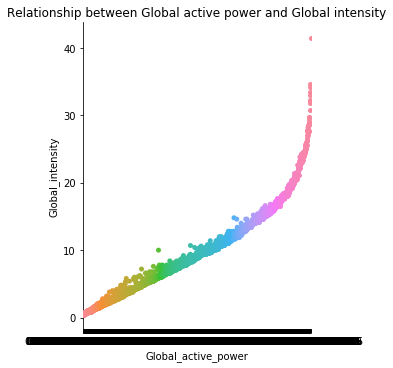

In [32]:
import seaborn as sns
sns.catplot(x='Global_active_power', y='Global_intensity', data=df_small1)
plt.title('Relationship between Global active power and Global intensity')

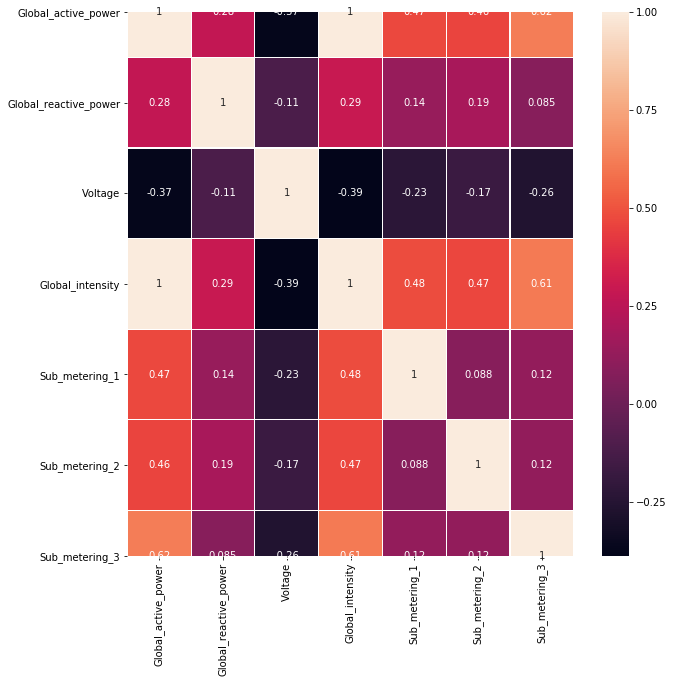

In [33]:
# Name two pairs of highly correlated variables.
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
ax1=ax
matrix_corr = df_small1.corr()
sns.heatmap(matrix_corr, xticklabels=matrix_corr.columns.values, yticklabels=matrix_corr.columns.values, annot=True, linewidths=.15, ax=ax1)

### Name of others pairs of highly correlated variables.

- We do have also the couple (<b>Global active power</b>, <b>Sub metering 3</b>) and (<b>Global intensity</b>, <b>Sub metering 3</b>) which are moderately positively correlated. 

## Task 4: Simple Linear Regression

Find the parameters of a simple linear model with Global_intensity as the explanatory variable and Global_active_power as the dependent variable

- Print out the model parameters and score

### Answer:

## First Methode, we train and test on the same dataset.

In [34]:
# Let's import useful library
from sklearn import linear_model
from sklearn.metrics import mean_squared_error 

#  initialize the model, and name it lr
lr =linear_model.LinearRegression()

# Let's define variable
X =np.array(df_small1['Global_intensity']).reshape(-1,1)
y = list(df_small1['Global_active_power'])

# Build a simple model 
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
#find parameters, as well as the R-Squared Value
print ("Intercept: ", lr.intercept_)
print ("Coefficient: ",lr.coef_)

Intercept:  -0.010615256571211207
Coefficient:  [0.23634482]


In [36]:
# Print out the model score
print("Coefficient of determination: " + str(lr.score(X, y)))

Coefficient of determination: 0.9978408730657677


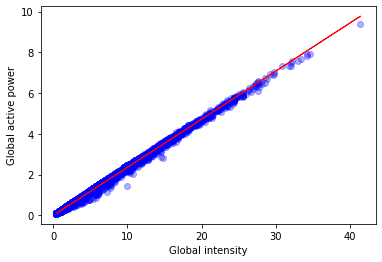

In [37]:
#To make predictions on the test data
plt.scatter(X, y, c="b", alpha =.3, label ='explanatory')
plt.plot(X, [lr.predict([x]) for x in X], color="r", linewidth=1, label="Predictions")
plt.xlabel("Global intensity")
plt.ylabel("Global active power")
plt.show()

## Interpretation
When Global active power increases, the Global intensity increases as well, and  inversely when the global intensity increases the global active power increases as well.

In [38]:
# Predicting the score accuracy
y_pred = lr.predict(X)
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y, y_pred)))

Root Mean Squared Error: 0.055092893416202354


## Alternatively solution: Split data into training and test sets.
But we could also go deeper splitting data into training and testing set. 

In [39]:
# In that case let us import appropriate library
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 

# Let's define variable
X =np.array(df_small1['Global_intensity']).reshape(-1,1)
y = list(df_small1['Global_active_power'])

# Split data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # Split randomly our data

In [40]:
# Let us train our data
model = linear_model.LinearRegression() # Define a chosen model
model.fit(X_train, y_train)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
# Print out the model parameters 
print ("Intercept: ", model.intercept_)
print ("Coefficient: ",model.coef_)

Intercept:  -0.009706929791167385
Coefficient:  [0.23616789]


In [42]:
# Print out the model score
metric_r_square = model.score(X_test, y_test)         #scoring the model
print("Coefficient of determination:", metric_r_square)

Coefficient of determination: 0.997929781547122


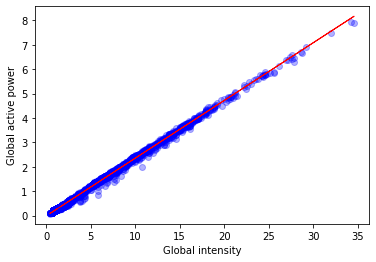

In [43]:
# To make predictions on the test data
plt.scatter(X_test, y_test, c="b", alpha =.3, label ='explanatory')
plt.plot(X_test, [lr.predict([x]) for x in X_test], color="r", linewidth=1, label="Predictions")
plt.xlabel("Global intensity")
plt.ylabel("Global active power")
plt.show()

## Interpretation
When Global active power increases, the Global intensity increases as well, and  inversely when the global intensity increases the global active power increases as well.

In [44]:
# Predicting the score accuracy
y_pred = model.predict(X_test)
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 0.054297013871990304


## Task 5: Regression, but harder this time

You didn't think it was going to be that easy? Intensity and power are different measures of essentially the same thing. We want to predict power from the other readings - a much harder task.

Tasks: 
- Predict the power based on as many of the other factors as you think necessary. As before, print out model parameters and the score, both when using the model on your sample and when running it (i.e. score()) over the whole dataset.

### Answer:

In [45]:
# Extraction the useful data
Explanatory = df_small1[['Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].values # Voltage is left because the correlation with power is very low
Power = df_small1[['Global_active_power']].values
X, y = np.array(Explanatory), np.array(Power)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.2, random_state=1)

# Train model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

# print out parameters
print("Coefficient:" + str(model.coef_))
print(" Intercept:" + str(model.intercept_))

#print out score
r_square_meas = model.score(X_test, y_test)
print("Coefficient of determination: " + str(r_square_meas))

Coefficient:[[ 0.23488047 -0.0007265  -0.00054574  0.00224152]]
 Intercept:[-0.01465877]
Coefficient of determination: 0.9981222908730251


In [46]:
# Predicting the score accuracy
print("Train Score:", model.score(X_train, y_train))
print("Test Score:", model.score(X_test, y_test))

Train Score: 0.998031180689095
Test Score: 0.9981222908730251


In [47]:
#Calculate the MSE and RMSE
predictor = model.predict(X_test)
mean_squared_error = np.mean((y_test - predictor)**2)
print("Mean Square Error:", mean_squared_error)
print("Root Mean Square Error:", np.sqrt(mean_squared_error))

Mean Square Error: 0.00261621395534499
Root Mean Square Error: 0.051148938946423805


## Task 6 - Logistic Regression

Use logistic regression to predict occasions when Sub_metering_1 is greater than Sub_metering_2 - in other words, when is the kitchen more in use then the laundry room? 
Tasks: 
- Add a column with a 1 when kitchen power is higher than laundry room (sub_metering_1>2) and a 0 when not. 
- Build a logistic regression model with this as the dependant variable. Use any variables as inputs.
- How did your model score? Briefly comment with your thoughts. Do you think this is something one could feasibly predict from the available data?

In [48]:
# Import useful library
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Adding column with a 1 or 0 depending on the position order of sub_metering_1 and Sub_metering_2.
df_LogReg = df_small1.iloc[:,0:9]
df_LogReg['Diff_Higher'] = np.where(df_LogReg['Sub_metering_1'] > df_LogReg['Sub_metering_2'], "1", "0")
df_LogReg

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Diff_Higher
83025,27/02/2007,15:45:00,0.222,0.000,244.63,1.0,0.0,0.0,0.0,0
15118,11/01/2007,11:58:00,0.304,0.164,241.62,1.4,0.0,1.0,0.0,0
51370,05/02/2007,16:10:00,1.676,0.094,241.00,6.8,0.0,1.0,18.0,0
218530,01/06/2007,18:10:00,0.348,0.078,234.87,1.6,0.0,1.0,0.0,0
40682,29/01/2007,06:02:00,0.338,0.152,247.16,1.4,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
215053,30/05/2007,08:13:00,1.276,0.000,231.99,5.4,1.0,0.0,17.0,1
94184,07/03/2007,09:44:00,1.738,0.142,236.75,7.4,0.0,2.0,17.0,0
24090,17/01/2007,17:30:00,3.962,0.076,239.06,16.6,0.0,32.0,18.0,0
151347,16/04/2007,02:27:00,0.130,0.000,242.38,0.6,0.0,0.0,0.0,0


In [49]:
# Let us set variables

X = df_LogReg[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity','Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
y = df_LogReg['Diff_Higher'].values

# Split data into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=0)

# Initialise the object LogisticRegression:
model = linear_model.LogisticRegression(solver ='liblinear')

# fit the model
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
# Print out parameters:
print("Intercept coefficient:", model.intercept_)
print("Coefficient:", model.coef_)

Intercept coefficient: [0.03966406]
Coefficient: [[ 0.04876136  0.4367684  -0.02600647  0.040054    8.04296136 -7.99144233
   0.02360258]]


In [51]:
# Print out the score:
r_square_meas = model.score(X_test, y_test)
print('Coefficient of determination: ' + str(r_square_meas))

Coefficient of determination: 1.0


Text(0.5, 1.0, 'Relationship between Sub_metering_3 and Diff_Higher')

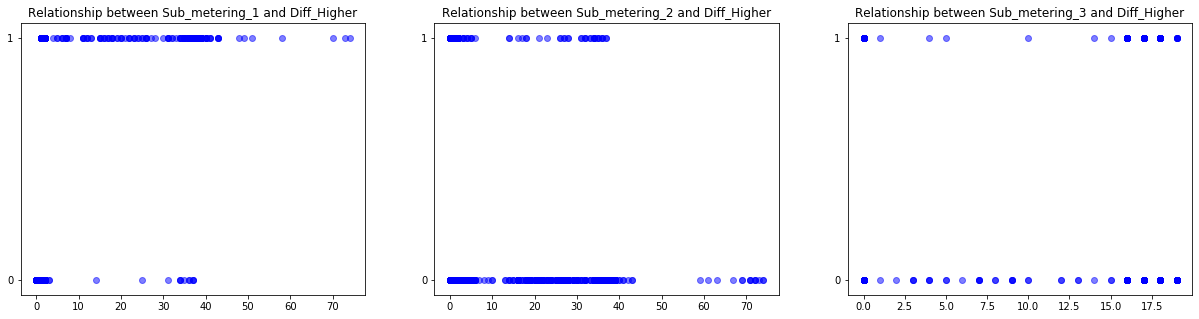

In [52]:
fig, ax = plt.subplots(ncols=3, figsize=(21,5))
(ax1, ax2, ax3)=ax
x=df_LogReg['Sub_metering_1']
ax1.scatter(x, y, c='b', alpha=.5)
ax1.set_title('Relationship between Sub_metering_1 and Diff_Higher')

x1=df_LogReg['Sub_metering_2']
ax2.scatter(x1, y, c='b', alpha=.5)
ax2.set_title('Relationship between Sub_metering_2 and Diff_Higher')

x2=df_LogReg['Sub_metering_3']
ax3.scatter(x2, y, c='b', alpha=.5)
ax3.set_title('Relationship between Sub_metering_3 and Diff_Higher')

Text(0.5, 1.0, 'Relationship between Global_intensity and Diff_Higher')

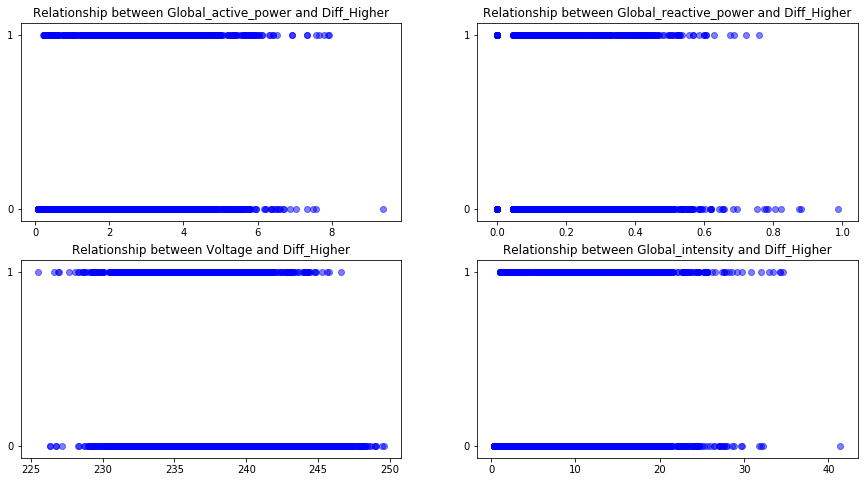

In [53]:
fig, ax = plt.subplots(nrows = 2, ncols=2, figsize=(15,8))
(ax1, ax2), (ax3, ax4)=ax
x=df_LogReg['Global_active_power']
ax1.scatter(x, y, c='b', alpha=.5)
ax1.set_title('Relationship between Global_active_power and Diff_Higher')

x1=df_LogReg['Global_reactive_power']
ax2.scatter(x1, y, c='b', alpha=.5)
ax2.set_title('Relationship between Global_reactive_power and Diff_Higher')

x2=df_LogReg['Voltage']
ax3.scatter(x2, y, c='b', alpha=.5)
ax3.set_title('Relationship between Voltage and Diff_Higher')

x3 = df_LogReg['Global_intensity']
ax4.scatter(x3, y, c='b', alpha=.5)
ax4.set_title('Relationship between Global_intensity and Diff_Higher')

Either the overfitting or data bestly fits the model. 

## Task 7 - Visualizations and conclusions

Well done! You're almost through. Now for some final easy points, pick three of the following questions and create a visualization and some text to answer the question:
- What time of day is the kitchen used?
- Does the weekly power consumption remain constant?
- Which sub-metering zone used the most power?
- How did power use in the different zones change over time?
- How did the two small subsamples you created in the beginning (1000 rows each) differ?

### What time of day is the kitchen used?

In [54]:
df_day = df_LogReg.loc[(df_LogReg['Date'] >= '2007-01-01') & (df_LogReg['Date'] <= '2007-01-07')]
df_day1 = df_day[['Date', 'Time', 'Sub_metering_1']]
df_day1.sort_values('Date')

,Date,Time,Sub_metering_1


In [55]:
from datetime import datetime
# Format date
df_day1['Datetime'] = df_day1.Date.astype(str).str.cat(df_day1.Time.astype(str), sep=' ') # Join Date and time as string.
df_day1['Datetime'] = df_day1['Datetime'].astype('datetime64[ns]')                           # Convert to date type
df_day1['Datetime'] = pd.to_datetime(df_day1['Datetime'], "%d-%m-%Y %H:%M:%S")               # Format date
df_day1

,Date,Time,Sub_metering_1,Datetime


In [56]:
df_day2 = df_day1.groupby('Date').agg('max')
df_day2

,Time,Sub_metering_1,Datetime
Date,,,


### Interpretation
The kitchen is more used between <b>23:30:00</b> and <b>23:59:00</b> everyday.

### Does the weekly power consumption remain constant?

We are to compare data mean of consommation during differents weeks.

In [57]:
# Extract useful columns in a new dataframe
df_LogReg1 = df_LogReg.loc[:,['Date', 'Time', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
df_LogReg1

,Date,Time,Sub_metering_1,Sub_metering_2,Sub_metering_3
83025,27/02/2007,15:45:00,0.0,0.0,0.0
15118,11/01/2007,11:58:00,0.0,1.0,0.0
51370,05/02/2007,16:10:00,0.0,1.0,18.0
218530,01/06/2007,18:10:00,0.0,1.0,0.0
40682,29/01/2007,06:02:00,0.0,0.0,0.0
...,...,...,...,...,...
215053,30/05/2007,08:13:00,1.0,0.0,17.0
94184,07/03/2007,09:44:00,0.0,2.0,17.0
24090,17/01/2007,17:30:00,0.0,32.0,18.0
151347,16/04/2007,02:27:00,0.0,0.0,0.0


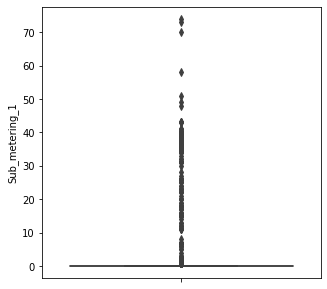

In [58]:
# Let's have a look at the distribution of each column
plt.figure(figsize=(5,5))
sns.boxplot(y=df_LogReg1["Sub_metering_1"], data=df_LogReg1)

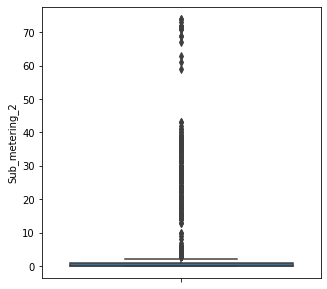

In [59]:
# Let's have a look at the distribution of each column
plt.figure(figsize=(5,5))
sns.boxplot(y=df_LogReg1["Sub_metering_2"], data=df_LogReg1)

In [60]:
# Define a function remove outlier from data set
def remove_outlier(df_in, column_name):
    first_quartile = df_in[column_name].quantile(0.25)
    third_quartile = df_in[column_name].quantile(0.75)
    iqr = third_quartile - first_quartile # Interquartile range
    fence_low = first_quartile - 1.5*iqr
    fence_high = third_quartile + 1.5*iqr
    data_out = df_in.loc[(df_in[column_name] > fence_low) & (df_in[column_name] < fence_high)]
    return data_out

In [61]:
df_LogReg_fil = remove_outlier(df_LogReg1, 'Sub_metering_1')
df_LogReg_fil = remove_outlier(df_LogReg_fil, 'Sub_metering_2')
df_LogReg_fil

,Date,Time,Sub_metering_1,Sub_metering_2,Sub_metering_3


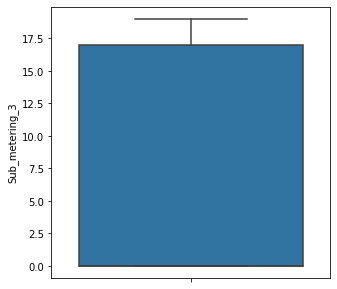

In [62]:
plt.figure(figsize=(5,5))
sns.boxplot(y=df_LogReg1["Sub_metering_3"], data=df_LogReg)

In [63]:
# Extract useful columns into a new dataframe
df_LogReg1 = df_LogReg.loc[:,["Date", 'Time', "Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]] 

In [64]:
from datetime import datetime

# Format date
df_LogReg1["Date"] =df_LogReg1["Date"].astype('datetime64[ns]') # Convert to date type
df_LogReg1["Date"] = pd.to_datetime(df_LogReg1["Date"], "%d-%m-%Y")  # Format date
 
#from datetime import datetime.fromtimestamp(Timestamp)
df_LogReg1['Datetime'] = df_LogReg1.Date.astype(str).str.cat(df_LogReg1.Time.astype(str), sep=' ') # Join Date and time as string.
df_LogReg1['Datetime'] = df_LogReg1['Datetime'].astype('datetime64[ns]')                           # Convert to date type
df_LogReg1['Datetime'] = pd.to_datetime(df_LogReg1['Datetime'], "%d-%m-%Y %H:%M:%S")               # Format date
df_LogReg1

,Date,Time,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
83025,2007-02-27,15:45:00,0.0,0.0,0.0,2007-02-27 15:45:00
15118,2007-11-01,11:58:00,0.0,1.0,0.0,2007-11-01 11:58:00
51370,2007-05-02,16:10:00,0.0,1.0,18.0,2007-05-02 16:10:00
218530,2007-01-06,18:10:00,0.0,1.0,0.0,2007-01-06 18:10:00
40682,2007-01-29,06:02:00,0.0,0.0,0.0,2007-01-29 06:02:00
...,...,...,...,...,...,...
215053,2007-05-30,08:13:00,1.0,0.0,17.0,2007-05-30 08:13:00
94184,2007-07-03,09:44:00,0.0,2.0,17.0,2007-07-03 09:44:00
24090,2007-01-17,17:30:00,0.0,32.0,18.0,2007-01-17 17:30:00
151347,2007-04-16,02:27:00,0.0,0.0,0.0,2007-04-16 02:27:00


In [65]:
# Group into weeks and sum up the consumption values
df_LogReg1.sort_values('Date')                  # Sort dataframe by date
df_LogReg1.set_index(df_LogReg1["Datetime"],inplace=True) # Convert dataframe to pandas.DateTimeIndex 
df_LogReg1

,Date,Time,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
Datetime,,,,,,
2007-02-27 15:45:00,2007-02-27,15:45:00,0.0,0.0,0.0,2007-02-27 15:45:00
2007-11-01 11:58:00,2007-11-01,11:58:00,0.0,1.0,0.0,2007-11-01 11:58:00
2007-05-02 16:10:00,2007-05-02,16:10:00,0.0,1.0,18.0,2007-05-02 16:10:00
2007-01-06 18:10:00,2007-01-06,18:10:00,0.0,1.0,0.0,2007-01-06 18:10:00
2007-01-29 06:02:00,2007-01-29,06:02:00,0.0,0.0,0.0,2007-01-29 06:02:00
...,...,...,...,...,...,...
2007-05-30 08:13:00,2007-05-30,08:13:00,1.0,0.0,17.0,2007-05-30 08:13:00
2007-07-03 09:44:00,2007-07-03,09:44:00,0.0,2.0,17.0,2007-07-03 09:44:00
2007-01-17 17:30:00,2007-01-17,17:30:00,0.0,32.0,18.0,2007-01-17 17:30:00


In [66]:
df_week = df_LogReg1.resample('W').sum()
df_week

,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,
2007-01-07,201.0,183.0,2298.0
2007-01-14,405.0,147.0,986.0
2007-01-21,843.0,708.0,3302.0
2007-01-28,432.0,428.0,2788.0
2007-02-04,127.0,532.0,2960.0
2007-02-11,199.0,131.0,464.0
2007-02-18,379.0,766.0,2310.0
2007-02-25,333.0,474.0,2399.0
2007-03-04,293.0,466.0,1955.0


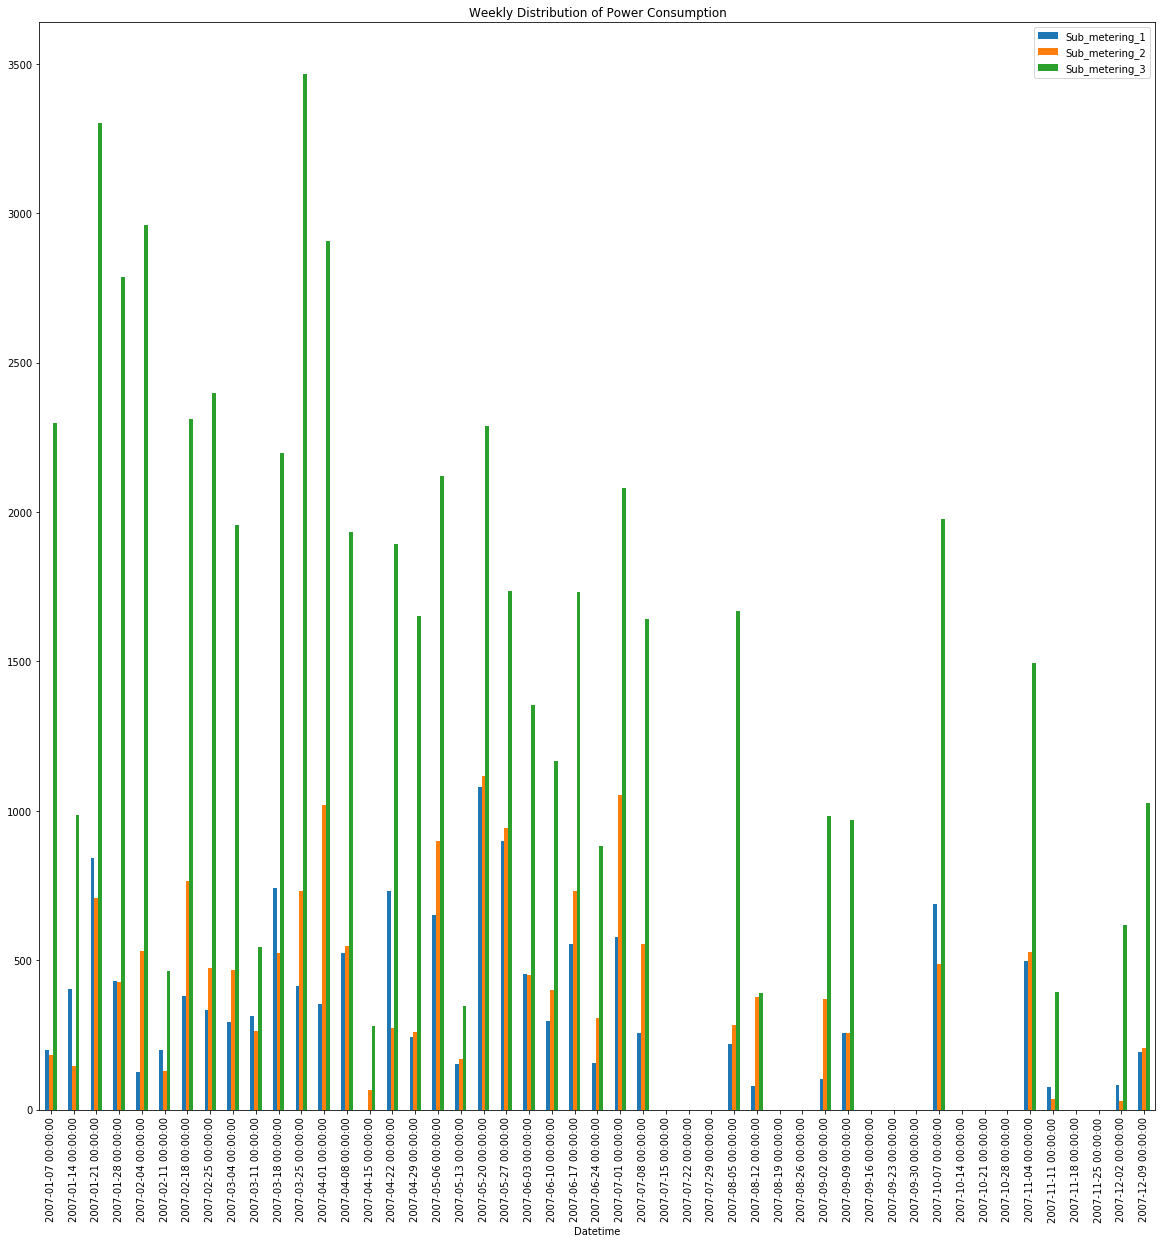

In [67]:
# Plot 
fig, ax = plt.subplots(figsize=(20,20))
ax1 =ax
df_week.plot(kind='bar', ax =ax1)  # Plot 
plt.title('Weekly Distribution of Power Consumption')
plt.show()

### Which sub-metering zone used the most power?

In [68]:
df_LogReg2 = df_LogReg1.iloc[:,2:5]
df_LogReg2.describe()

,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,10000.000000,10000.000000,10000.000000
mean,1.381200,1.672300,5.921600
std,6.797713,6.514319,8.220962
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,1.000000,17.000000
max,74.000000,74.000000,19.000000


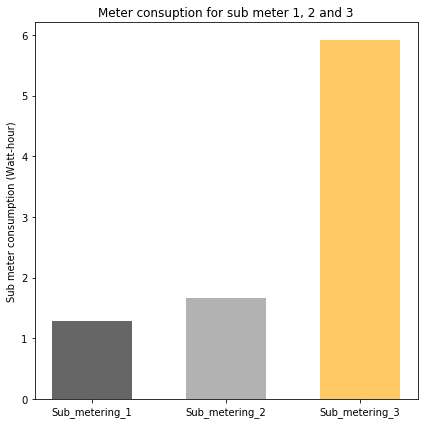

In [69]:
# Using a bar graph for visual interpretation, we might give a good result.
import numpy as np
import matplotlib.pyplot as plt


n_groups = 3
means_meter = (1.2899, 1.6689, 5.9115) # extracted from descriptive statistics
fig, ax = plt.subplots(figsize=(6,6))
index = np.arange(n_groups)
bar_width = 0.6
opacity = 0.6

rect1 = plt.bar(index, means_meter, bar_width, alpha=opacity, color=['black','gray','orange'])

plt.ylabel("Sub meter consumption (Watt-hour)")
plt.title("Meter consuption for sub meter 1, 2 and 3")
plt.xticks(index, ("Sub_metering_1", "Sub_metering_2", "Sub_metering_3"))
plt.legend

plt.tight_layout()
plt.show()

The sub-metering using the most power is the sub-metering 3.

### How did power use in the different zones change over time?

Text(0.5, 1.0, 'Distribution of Power Consumption in the kitchen')

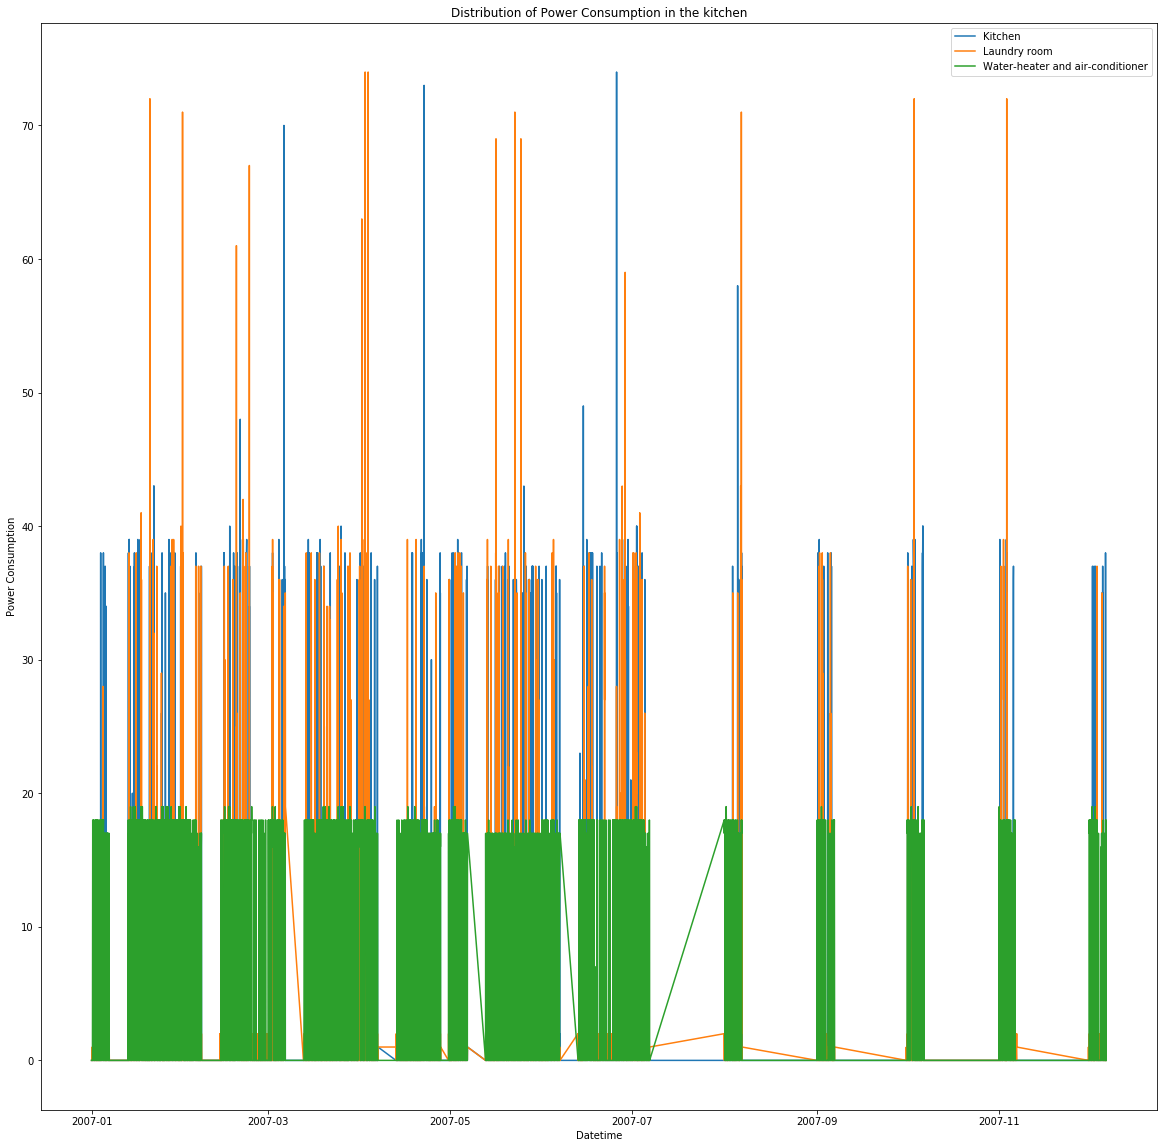

In [70]:
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

fig, ax = plt.subplots(figsize=(20,20))
ax1 =ax

sns.lineplot(x="Datetime", y="Sub_metering_1", data=df_LogReg1, label = 'Kitchen', ax = ax1);
sns.lineplot(x="Datetime", y="Sub_metering_2", data=df_LogReg1, label = 'Laundry room', ax = ax1);
sns.lineplot(x="Datetime", y="Sub_metering_3", data=df_LogReg1, label = 'Water-heater and air-conditioner', ax = ax1);
plt.legend(loc='upper right')
plt.ylabel('Power Consumption')
plt.title('Distribution of Power Consumption in the kitchen')

### How did the two small subsamples you created in the beginning (1000 rows each) differ?

Text(0.5, 1.0, 'Dist. of Global intensity for the rows starting at 75000 rows')

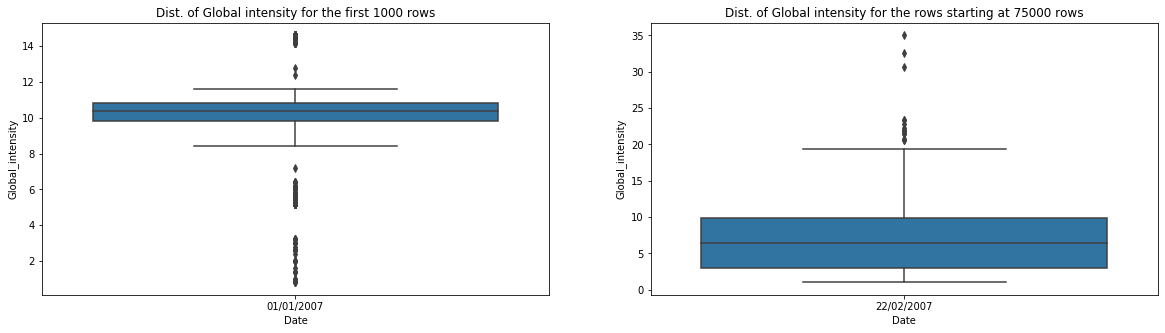

In [78]:
fig, ax = plt.subplots(ncols= 2, figsize=(20,5))
(ax1,ax2)=ax
sns.boxplot(x =df_1000["Date"], y=df_1000["Global_intensity"], data=df_1000, ax =ax1).set_title('Dist. of Global intensity for the first 1000 rows')
sns.boxplot(x =df_75000["Date"], y=df_75000["Global_intensity"], data=df_75000, ax =ax2).set_title('Dist. of Global intensity for the rows starting at 75000 rows')